In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
#Rhode Island Price of Natural Gas Delivered to Residential Consumers (Dollars per Thousand Cubic Feet)
gas = pd.read_excel("N3010RI3m.xls", sheet_name= 'Data 1', skiprows=[0,1], names = ['Date','Gas'])
gas['Date'] = gas['Date'].dt.strftime('%Y-%m')
gas.head()

,Date,Gas
0,1989-01,6.56
1,1989-02,7.00
2,1989-03,6.98
3,1989-04,7.13
4,1989-05,7.26


In [67]:
#Rhode Island : electricity price, residential, cents per kilowatthour
elec = pd.read_csv("Average_retail_price_of_electricity.csv")
elec = elec[elec['description'] == 'Rhode Island : residential']
elec = pd.melt(elec, id_vars=['description', 'units', 'source key'], var_name='Date', value_name='value')
elec['Date'] = pd.to_datetime(elec['Date'], format='%b %Y')
elec['Date'] = elec['Date'].dt.strftime('%Y-%m')
elec = elec[['Date', 'value']]
elec = elec.rename(columns={'value': 'Electricity'})
elec.head()

,Date,Electricity
0,2001-01,11.96
1,2001-02,12.02
2,2001-03,12.04
3,2001-04,13.17
4,2001-05,12.38


In [73]:
eviction = pd.read_csv("rhode_island_monthly_2020_2021.csv")
eviction['Date'] = pd.to_datetime(eviction['month'], format='%m/%Y')
eviction['Date'] = eviction['Date'].dt.strftime('%Y-%m')
eviction = eviction.groupby('Date')['filings_2020'].sum().reset_index()
eviction.head()

,Date,filings_2020
0,2020-01,821
1,2020-02,578
2,2020-03,273
3,2020-04,0
4,2020-05,2


In [85]:
df = pd.merge(eviction, elec, on='Date', how='left')
df = pd.merge(df, gas, on='Date', how='left')

df['Date'] = pd.to_datetime(df['Date'])
df['Electricity'] = pd.to_numeric(df['Electricity'], errors='coerce')

#df.info()
print(df)

         Date  filings_2020  Electricity    Gas
0  2020-01-01           821        24.23  13.52
1  2020-02-01           578        22.64  13.79
2  2020-03-01           273        23.25  13.91
3  2020-04-01             0        23.37  14.38
4  2020-05-01             2        21.20  15.09
5  2020-06-01           447        19.28  17.58
6  2020-07-01           389        19.52  19.88
7  2020-08-01           453        22.13  21.54
8  2020-09-01           470        21.98  21.54
9  2020-10-01           458        22.43  18.98
10 2020-11-01           479        23.58  16.15
11 2020-12-01           423        22.59  15.45
12 2021-01-01           404        23.41  14.86
13 2021-02-01           321        24.09  14.71
14 2021-03-01           474        23.34  14.84
15 2021-04-01           320        23.54  15.64
16 2021-05-01           418        20.80  17.06
17 2021-06-01           488        19.74  19.15
18 2021-07-01           449        20.51  21.44
19 2021-08-01           432        20.35

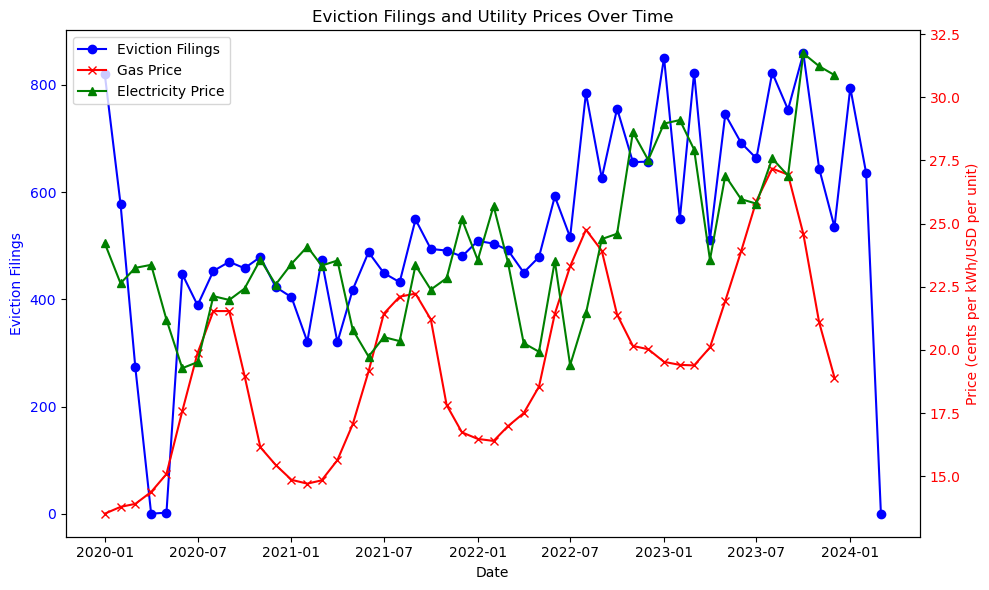

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

df.sort_values('Date', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['Date'], df['filings_2020'], color='blue', label='Eviction Filings', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Eviction Filings', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.plot(df['Date'], df['Gas'], color='red', label='Gas Price', marker='x')
ax2.plot(df['Date'], df['Electricity'], color='green', label='Electricity Price', marker='^')
ax2.set_ylabel('Price (cents per kWh/USD per unit)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Eviction Filings and Utility Prices Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
